<a href="https://colab.research.google.com/github/nhunbtran155/exercise-25-3-2025/blob/main/EXERCISE_25_3_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



GRAB



In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

ride_distance = ctrl.Antecedent(np.arange(0,55.1,0.1), 'ride_distance')
traffic_condition = ctrl.Antecedent(np.arange(0,100.1,0.1), 'traffic_condition')
demand_level = ctrl.Antecedent(np.arange(0,100.1,0.1),'demand_level')
weather = ctrl.Antecedent(np.arange(0,3.1,0.1), 'weather')
rating = ctrl.Antecedent(np.arange(0,5.1,0.1), 'rating')
punctuality = ctrl.Antecedent(np.arange(0,100.1,0.1), 'punctuality')

cost = ctrl.Consequent(np.arange(0,10.1,0.1), 'cost')
score_customer = ctrl.Consequent(np.arange(0,10,0.1), 'score_customer')

ride_distance['S'] = fuzz.trimf(ride_distance.universe, [0,0,4.5])
ride_distance['M'] = fuzz.trimf(ride_distance.universe, [2.15,4.5,11.5])
ride_distance['L'] = fuzz.trimf(ride_distance.universe, [4.5,11.5,20])
ride_distance['VL'] = fuzz.trimf(ride_distance.universe, [11.5,35,50])

traffic_condition['L'] = fuzz.trimf(traffic_condition.universe, [0,0,50])
traffic_condition['M'] = fuzz.trimf(traffic_condition.universe, [0,50,100])
traffic_condition['H'] = fuzz.trimf(traffic_condition.universe, [50,100,100])

demand_level['L'] = fuzz.trimf(demand_level.universe, [0,0,50])
demand_level['M'] = fuzz.trimf(demand_level.universe, [0,50,100])
demand_level['H'] = fuzz.trimf(demand_level.universe, [50,50,100])

weather['G'] = fuzz.trimf(weather.universe, [0,0,2.5])
weather['M'] = fuzz.trimf(weather.universe, [0,2.5,5])
weather['B'] = fuzz.trimf(weather.universe, [2.5,2.5,5])

rating['P'] = fuzz.trimf(rating.universe, [0,0,2.5])
rating['A'] = fuzz.trimf(rating.universe, [0,2.5,5])
rating['G'] = fuzz.trimf(rating.universe, [2.5,2.5,5])

punctuality['L'] = fuzz.trimf(punctuality.universe, [0,0,50])
punctuality['O'] = fuzz.trimf(punctuality.universe, [0,50,100])
punctuality['E'] = fuzz.trimf(punctuality.universe, [50,100,100])

cost['L'] = fuzz.trimf(cost.universe, [0,0,2.5])
cost['M'] = fuzz.trimf(cost.universe, [1.5,2.5,5])
cost['H'] = fuzz.trimf(cost.universe, [2.5,5,7.5])
cost['VH'] = fuzz.trimf(cost.universe, [5.25,7.5,10])

score_customer['N'] = fuzz.trimf(score_customer.universe, [0,0,2.5])
score_customer['F'] = fuzz.trimf(score_customer.universe, [2.5,4.25,5])
score_customer['M'] = fuzz.trimf(score_customer.universe, [4.5,5.5,7.5])
score_customer['H'] = fuzz.trimf(score_customer.universe, [6.5,7,9])

In [ ]:
rule1 = ctrl.Rule(ride_distance['S']&traffic_condition['L']&demand_level['L'], cost['L'])
rule2 = ctrl.Rule(ride_distance['S']&traffic_condition['M']&demand_level['H'], cost['M'])
rule3 = ctrl.Rule(ride_distance['M']&traffic_condition['H']&demand_level['H'], cost['H'])
rule4 = ctrl.Rule(ride_distance['L']&traffic_condition['M']&weather['G'], cost['M'])
rule5 = ctrl.Rule(ride_distance['L']&traffic_condition['H']&weather['B'], cost['VH'])
rule6 = ctrl.Rule(ride_distance['VL']&traffic_condition['H']&demand_level['H'], cost['VH'])
rule7 = ctrl.Rule(ride_distance['M']&traffic_condition['L']&demand_level['L'], cost['M'])
rule8 = ctrl.Rule(ride_distance['S']&traffic_condition['H']&weather['B'], cost['H'])
rule9 = ctrl.Rule(ride_distance['M']&traffic_condition['M']&weather['M'], cost['M'])
rule10 = ctrl.Rule(ride_distance['VL']&weather['B'], cost['VH'])

rule11 = ctrl.Rule(rating['G']&punctuality['E'], score_customer['H'])
rule12 = ctrl.Rule(rating['A']&punctuality['O'], score_customer['M'])
rule13 = ctrl.Rule(rating['P']&punctuality['L'], score_customer['F'])

rule14 = ctrl.Rule(ride_distance['L']&traffic_condition['H']&punctuality['O'], cost['H'])
rule15 = ctrl.Rule(ride_distance['M']&traffic_condition['M']&rating['G'], score_customer['M'])
rule16 = ctrl.Rule(rating['P']&punctuality['L']&weather['M'], score_customer['N'])
rule17 = ctrl.Rule(ride_distance['VL']&weather['B']&rating['G'], score_customer['H'])
rule18 = ctrl.Rule(ride_distance['S']&rating['A']&punctuality['O'], score_customer['F'])
rule19 = ctrl.Rule(ride_distance['L']&traffic_condition['H']&punctuality['L'], score_customer['F'])
rule20 = ctrl.Rule(ride_distance['M']&weather['M']&rating['G'], score_customer['M'])

Gia di xe: 4.969099359924648
Diem thuong: 6.701190476190479


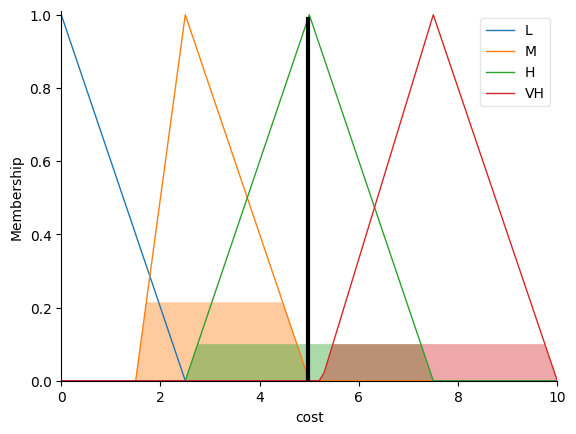

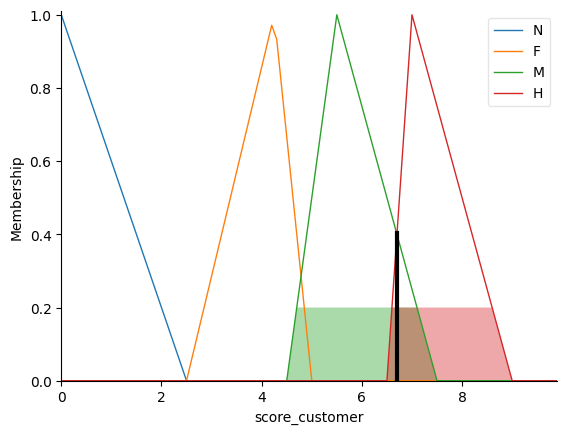

In [ ]:
fuzzy_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20])
fuzzy_system = ctrl.ControlSystemSimulation(fuzzy_system)
fuzzy_system.input['ride_distance'] = 10
fuzzy_system.input['traffic_condition'] = 55
fuzzy_system.input['demand_level'] = 60
fuzzy_system.input['weather'] = 4
fuzzy_system.input['rating'] = 4.5
fuzzy_system.input['punctuality'] = 70
fuzzy_system.compute()
print('Gia di xe:', fuzzy_system.output['cost'])
print('Diem thuong:', fuzzy_system.output['score_customer'])
cost.view(sim=fuzzy_system)
score_customer.view(sim=fuzzy_system)

SHOPPE

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
store_rating = ctrl.Antecedent(np.arange(0,5,1), 'store_rating')
sales_volume = ctrl.Antecedent(np.arange(0,10,1), 'sales_volume')
profit = ctrl.Antecedent(np.arange(0,100,1), 'profit')
event = ctrl.Antecedent(np.arange(0,20,1), 'event')
competitor_discount= ctrl.Antecedent(np.arange(0,3,1), 'competitor_discount')

percentage_discount = ctrl.Consequent(np.arange(0,90,1), 'percentage_discount')

store_rating['L'] = fuzz.trimf(store_rating.universe, [0,0,4.25])
store_rating['M'] = fuzz.trimf(store_rating.universe, [0,4.25,5])
store_rating['H'] = fuzz.trimf(store_rating.universe, [4.25,5,5])

sales_volume['L'] = fuzz.trimf(sales_volume.universe, [0,0,5])
sales_volume['M'] = fuzz.trimf(sales_volume.universe, [0,5,10])
sales_volume['H'] = fuzz.trimf(sales_volume.universe, [5,10,10])

profit['L'] = fuzz.trimf(profit.universe, [0,0,50])
profit['M'] = fuzz.trimf(profit.universe, [0,50,100])
profit['H'] = fuzz.trimf(profit.universe, [50,100,100])

event['N'] = fuzz.trimf(event.universe, [0,0,10])
event['M'] = fuzz.trimf(event.universe, [0,10,20])
event['H'] = fuzz.trimf(event.universe, [10,10,20])

competitor_discount['L'] = fuzz.trimf(competitor_discount.universe, [0,0,1.5])
competitor_discount['M'] = fuzz.trimf(competitor_discount.universe, [0,1.5,3])
competitor_discount['H'] = fuzz.trimf(competitor_discount.universe, [1.5,3,3])

percentage_discount['VL'] = fuzz.trimf(percentage_discount.universe, [0,0,7.5])
percentage_discount['L'] = fuzz.trimf(percentage_discount.universe, [5,7.5,15])
percentage_discount['M'] = fuzz.trimf(percentage_discount.universe, [7.5,15,30])
percentage_discount['H'] = fuzz.trimf(percentage_discount.universe, [15,30,55])
percentage_discount['VH'] = fuzz.trimf(percentage_discount.universe, [30,55,80])

In [ ]:
rule1 = ctrl.Rule(store_rating['H']&sales_volume['H']&profit['H'], percentage_discount['VL'])
rule2 = ctrl.Rule(store_rating['L']&sales_volume['L']&profit['H'], percentage_discount['H'])
rule3 = ctrl.Rule(event['H']&competitor_discount['H']&profit['H'], percentage_discount['VH'])
rule4 = ctrl.Rule(store_rating['M']&sales_volume['M']&profit['M'], percentage_discount['M'])
rule5 = ctrl.Rule(competitor_discount['L']&profit['L']&sales_volume['H'], percentage_discount['VL'])
rule6 = ctrl.Rule(store_rating['L']&event['N'], percentage_discount['M'])
rule7 = ctrl.Rule(sales_volume['L']&profit['L'], percentage_discount['VH'])

Ty le phan tram chiet khau la: 38.09262759924391


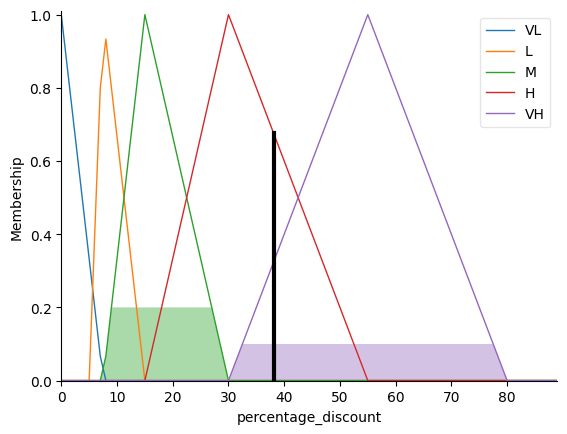

In [ ]:
fuzzy_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])
fuzzy_system = ctrl.ControlSystemSimulation(fuzzy_system)
fuzzy_system.input['store_rating'] = 4.3
fuzzy_system.input['sales_volume'] = 4.5
fuzzy_system.input['profit'] = 10
fuzzy_system.input['event'] = 20
fuzzy_system.input['competitor_discount'] = 3
fuzzy_system.compute()
print('Ty le phan tram chiet khau la:', fuzzy_system.output['percentage_discount'])
percentage_discount.view(sim=fuzzy_system)

SHOPEE STORE

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

product_demand = ctrl.Antecedent(np.arange(0,10,1), 'product_demand')
competitor_pressure = ctrl.Antecedent(np.arange(0,3,1), 'competitor_pressure')
reputation = ctrl.Antecedent(np.arange(0,5,1), 'reputation')
profit = ctrl.Antecedent(np.arange(0,20,1), 'profit')
season = ctrl.Antecedent(np.arange(0,30,1), 'season')

discount = ctrl.Consequent(np.arange(0,90,1), 'discount')

product_demand['L'] = fuzz.trimf(product_demand.universe, [0,0,5])
product_demand['M'] = fuzz.trimf(product_demand.universe, [0,5,10])
product_demand['H'] = fuzz.trimf(product_demand.universe, [5,10,10])

competitor_pressure['L'] = fuzz.trimf(competitor_pressure.universe, [0,0,1.5])
competitor_pressure['M'] = fuzz.trimf(competitor_pressure.universe, [0,1.5,3])
competitor_pressure['H'] = fuzz.trimf(competitor_pressure.universe, [1.5,1.5,3])

reputation['L'] = fuzz.trimf(reputation.universe, [0,0,2.5])
reputation['M'] = fuzz.trimf(reputation.universe, [0,2.5,5])
reputation['H'] = fuzz.trimf(reputation.universe, [2.5,5,5])

profit['L'] = fuzz.trimf(profit.universe, [0,0,5])
profit['M'] = fuzz.trimf(profit.universe, [0,8.5,17])
profit['H'] = fuzz.trimf(profit.universe, [8.5,17,17])

season['N'] = fuzz.trimf(season.universe, [0,0,15])
season['M'] = fuzz.trimf(season.universe, [0,15,30])
season['H'] = fuzz.trimf(season.universe, [15,15,30])

discount['VL'] = fuzz.trimf(discount.universe, [0,0,7.5])
discount['L'] = fuzz.trimf(discount.universe, [5,7.5,15])
discount['M'] = fuzz.trimf(discount.universe, [7.5,15,30])
discount['H'] = fuzz.trimf(discount.universe, [15,30,55])
discount['VH'] = fuzz.trimf(discount.universe, [30,55,80])

In [ ]:
rule1 = ctrl.Rule(product_demand['H']&competitor_pressure['L']&profit['L'], discount['VL'])
rule2 = ctrl.Rule(product_demand['L']&competitor_pressure['H']&profit['H'], discount['H'])
rule3 = ctrl.Rule(reputation['H']&profit['M']&season['H'], discount['M'])
rule4 = ctrl.Rule(competitor_pressure['H']&season['H']&profit['H'], discount['VH'])
rule5 = ctrl.Rule(reputation['L']&product_demand['M']&profit['L'], discount['M'])
rule6 = ctrl.Rule(product_demand['H']&season['N']&competitor_pressure['L'], discount['L'])
rule7 = ctrl.Rule(profit['H']&competitor_pressure['M']&season['M'], discount['M'])

Ty le phan tram chiet khau la: 18.289933953874087


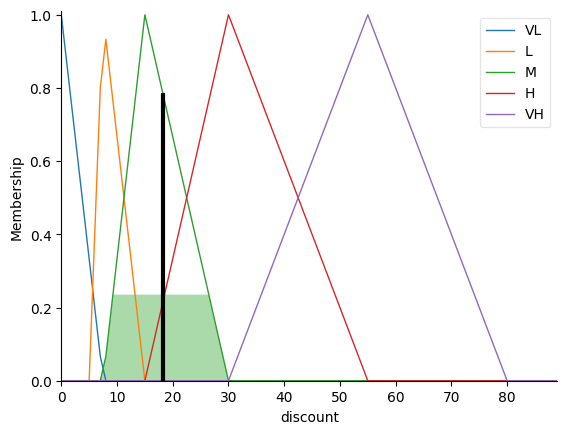

In [ ]:
fuzzy_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])
fuzzy_system = ctrl.ControlSystemSimulation(fuzzy_system)
fuzzy_system.input['product_demand'] = 9
fuzzy_system.input['competitor_pressure'] = 2.3
fuzzy_system.input['reputation'] = 4.2
fuzzy_system.input['profit'] = 2
fuzzy_system.input['season'] = 25
fuzzy_system.compute()
print('Ty le phan tram chiet khau la:', fuzzy_system.output['discount'])
discount.view(sim=fuzzy_system)


GIAO HANG, THU NHAP

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

density = ctrl.Antecedent(np.arange(0,5.1,0.1), 'density')
urgency = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'urgency')
load_driver = ctrl.Antecedent(np.arange(0,10.1,0.1), 'load_driver')
traffic_condition = ctrl.Antecedent(np.arange(0,3.1,0.1), 'traffic_condition')
profit = ctrl.Antecedent(np.arange(0,100.1,0.1), 'profit')

number_orders_combine = ctrl.Consequent(np.arange(0,30.1,0.1), 'number_orders_combine')
priority = ctrl.Consequent(np.arange(0,3.1,0.1), 'priority')

density['L'] = fuzz.trimf(density.universe, [0,0,2.51])
density['M'] = fuzz.trimf(density.universe, [0,2.3,4.7])
density['H'] = fuzz.trimf(density.universe, [2.3,2.3,4.7])

urgency['L'] = fuzz.trimf(urgency.universe, [0,0,2.5])
urgency['M'] = fuzz.trimf(urgency.universe, [0,2.5,5])
urgency['H'] = fuzz.trimf(urgency.universe, [2.5,5,5])

load_driver['L'] = fuzz.trimf(load_driver.universe, [0,0,5])
load_driver['M'] = fuzz.trimf(load_driver.universe, [0,5,10])
load_driver['H'] = fuzz.trimf(load_driver.universe, [5,10,10])

traffic_condition['L'] = fuzz.trimf(traffic_condition.universe, [0,0,1.5])
traffic_condition['M'] = fuzz.trimf(traffic_condition.universe, [0,1.5,3])
traffic_condition['H'] = fuzz.trimf(traffic_condition.universe, [1.2,3,3])

profit['L'] = fuzz.trimf(profit.universe, [0,0,50])
profit['M'] = fuzz.trimf(profit.universe, [0,25,50])
profit['H'] = fuzz.trimf(profit.universe, [25,50,50])

number_orders_combine['F'] = fuzz.trimf(number_orders_combine.universe, [0,0,15])
number_orders_combine['S'] = fuzz.trimf(number_orders_combine.universe, [0,15,30])
number_orders_combine['M'] = fuzz.trimf(number_orders_combine.universe, [15,30,30])

priority['L'] = fuzz.trimf(priority.universe, [0,0,1.51])
priority['M'] = fuzz.trimf(priority.universe, [0,1.5,3])
priority['H'] = fuzz.trimf(priority.universe, [1.5,3,3])

In [ ]:
rule1 = ctrl.Rule(density['H']&traffic_condition['L']&load_driver['L'], number_orders_combine['F'])
rule2 = ctrl.Rule(density['M']&traffic_condition['H']&urgency['M'], number_orders_combine['S'])
rule3 = ctrl.Rule(load_driver['H']&density['H']&profit['M'], number_orders_combine['M'])
rule4 = ctrl.Rule(density['L']&urgency['H']&traffic_condition['M'], number_orders_combine['F'])
rule5 = ctrl.Rule(profit['H']&urgency['H']&traffic_condition['H'], number_orders_combine['F'])
rule6 = ctrl.Rule(urgency['H']&profit['H'], priority['H'])
rule7 = ctrl.Rule(urgency['M']&traffic_condition['M'], priority['M'])
rule8 = ctrl.Rule(urgency['L']&density['H']&profit['L'], priority['L'])

So luong don hang can ket hop: 9.674430148556096
Muc do uu tien: 1.5308068459657698


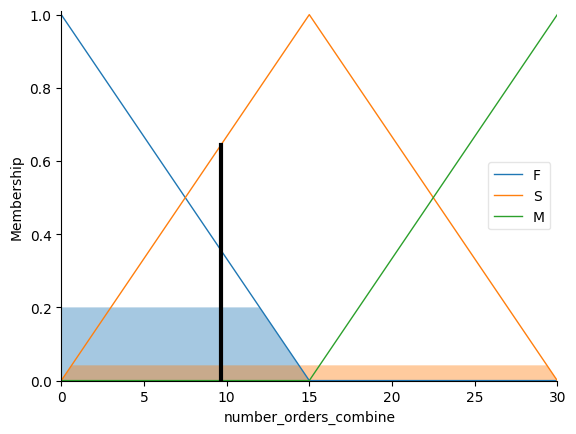

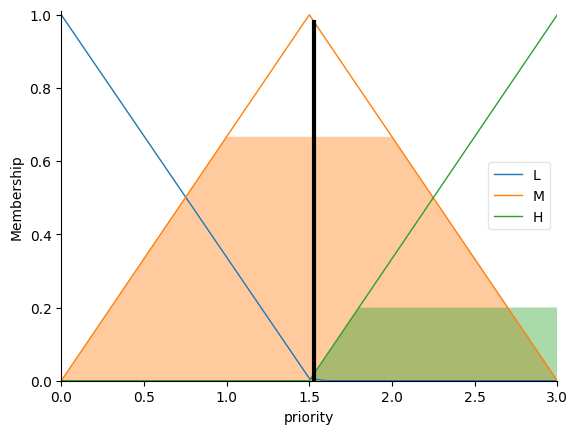

In [ ]:
fuzzy_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])
fuzzy_system = ctrl.ControlSystemSimulation(fuzzy_system)
fuzzy_system.input['density'] = 4.6
fuzzy_system.input['urgency'] = 3
fuzzy_system.input['load_driver'] = 3
fuzzy_system.input['traffic_condition'] = 2
fuzzy_system.input['profit'] = 30
fuzzy_system.compute()
print('So luong don hang can ket hop:', fuzzy_system.output['number_orders_combine'])
print('Muc do uu tien:', fuzzy_system.output['priority'])
number_orders_combine.view(sim=fuzzy_system)
priority.view(sim=fuzzy_system)

LUONG MUA

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

wind = ctrl.Antecedent(np.arange(0.7,3.2,0.1), 'wind')
temperature = ctrl.Antecedent(np.arange(20.4,40.1,0.1), 'temperature')
rainfall = ctrl.Consequent(np.arange(0.2,9.2,0.1), 'rainfall')

wind['VL'] = fuzz.trimf(wind.universe, [0.7,1.1,1.5])
wind['L'] = fuzz.trimf(wind.universe, [1.1,1.5,1.9])
wind['N'] = fuzz.trimf(wind.universe, [1.5,1.9,2.3])
wind['H'] = fuzz.trimf(wind.universe, [1.9,2.3,2.7])
wind['VH'] = fuzz.trimf(wind.universe, [2.3,2.7,3.1])

temperature['VL'] = fuzz.trimf(temperature.universe, [20.4,23.6,26.8])
temperature['L'] = fuzz.trimf(temperature.universe, [23.6,26.8,29.9])
temperature['N'] = fuzz.trimf(temperature.universe, [26.8,29.9,33.1])
temperature['H'] = fuzz.trimf(temperature.universe, [29.9,33.1,36.2])
temperature['VH'] = fuzz.trimf(temperature.universe, [33.1,36.2,39.6])

rainfall['VL'] = fuzz.trimf(rainfall.universe, [0.2,1.4,3.2])
rainfall['L'] = fuzz.trimf(rainfall.universe, [1.4,3.2,4.7])
rainfall['N'] = fuzz.trimf(rainfall.universe, [3.2,4.7,6.2])
rainfall['H'] = fuzz.trimf(rainfall.universe, [4.7,6.2,7.7])
rainfall['VH'] = fuzz.trimf(rainfall.universe, [6.2,7.7,9.2])

In [ ]:
rule1 = ctrl.Rule(wind['L']&temperature['H'], rainfall['VL'])
rule2 = ctrl.Rule(wind['H']&temperature['N'], rainfall['L'])
rule3 = ctrl.Rule(wind['H']&temperature['H'], rainfall['L'])
rule4 = ctrl.Rule(wind['N']&temperature['N'], rainfall['H'])
rule5 = ctrl.Rule(wind['N']&temperature['H'], rainfall['H'])
rule6 = ctrl.Rule(wind['N']&temperature['VH'], rainfall['VH'])

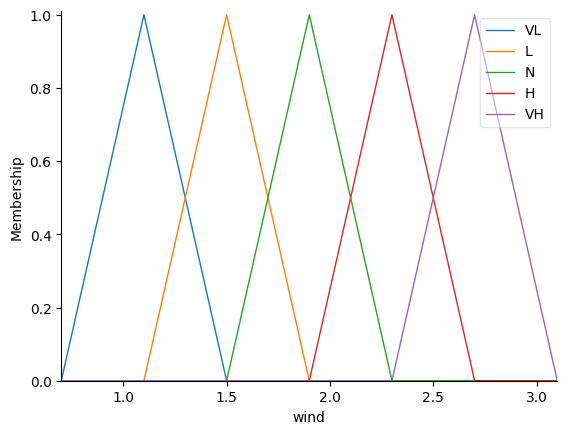

In [ ]:
wind.view()

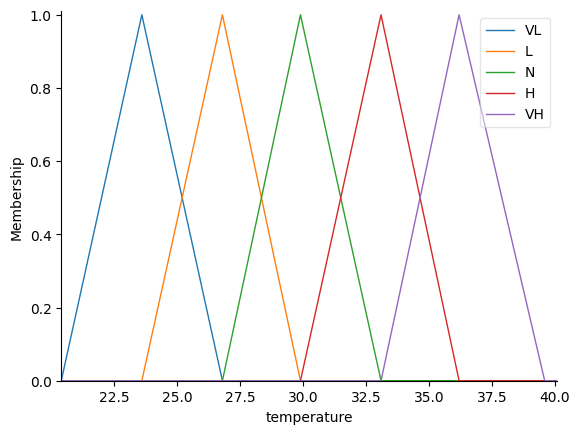

In [ ]:
temperature.view()

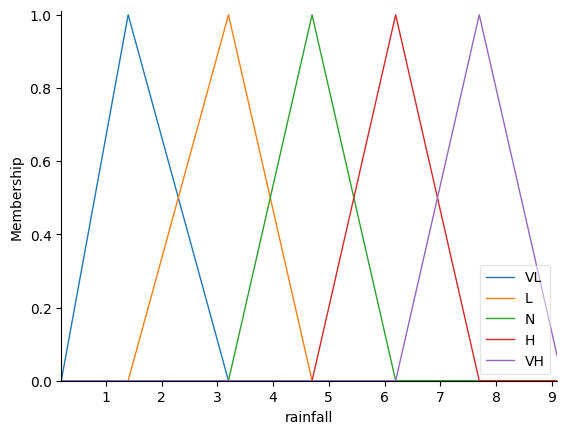

In [ ]:
rainfall.view()

luong mua: 4.5525064004096265


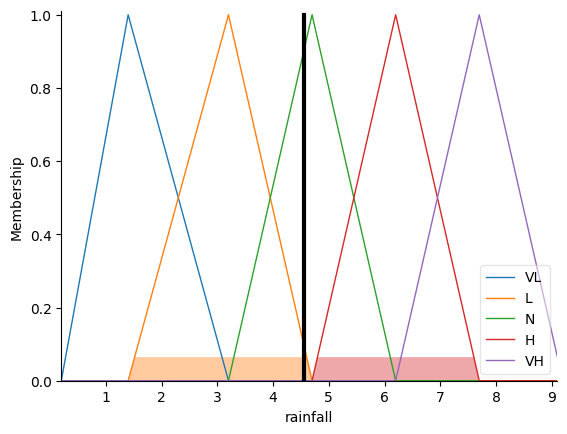

In [ ]:
fuzzy_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6])
fuzzy_system = ctrl.ControlSystemSimulation(fuzzy_system)
fuzzy_system.input['temperature'] = 27
fuzzy_system.input['wind'] = 2.1
fuzzy_system.compute()
print('luong mua:', fuzzy_system.output['rainfall'])
rainfall.view(sim=fuzzy_system)

Y Te

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

blood_sugar = ctrl.Antecedent(np.arange(0,300.1,0.1), 'blood_sugar')
body_index= ctrl.Antecedent(np.arange(0,55,0.1), 'body_index')
urination = ctrl.Antecedent(np.arange(0,10.1,0.1), 'urination')
fatigue = ctrl.Antecedent(np.arange(0,5.1,0.1), 'fatigue')

tieuduong = ctrl.Consequent(np.arange(0,10.1,0.1), 'tieuduong')

blood_sugar['L'] = fuzz.trimf(blood_sugar.universe, [0,45,110])
blood_sugar['N'] = fuzz.trimf(blood_sugar.universe, [45,110,175])
blood_sugar['H'] = fuzz.trimf(blood_sugar.universe, [110,175,220])
blood_sugar['VH'] = fuzz.trimf(blood_sugar.universe, [175,220,280])

body_index['L'] = fuzz.trimf(body_index.universe, [0,12.5,20.5])
body_index['N'] = fuzz.trimf(body_index.universe, [12.5,20.5,27.5])
body_index['H'] = fuzz.trimf(body_index.universe, [20.5,27.5,35])
body_index['VH'] = fuzz.trimf(body_index.universe, [27.5,35,40])

urination['L'] = fuzz.trimf(urination.universe, [0,0,5])
urination['M'] = fuzz.trimf(urination.universe, [0,5,10])
urination['H'] = fuzz.trimf(urination.universe, [5,10,10])

fatigue['L'] = fuzz.trimf(fatigue.universe, [0,0,2.5])
fatigue['M'] = fuzz.trimf(fatigue.universe, [0,2.5,5])
fatigue['H'] = fuzz.trimf(fatigue.universe, [2.5,5,5])

tieuduong['L'] = fuzz.trimf(tieuduong.universe, [0,2,4])
tieuduong['M'] = fuzz.trimf(tieuduong.universe, [2,4,6])
tieuduong['H'] = fuzz.trimf(tieuduong.universe, [4,6,8])
tieuduong['VH'] = fuzz.trimf(tieuduong.universe, [6,8,10])


In [ ]:
rule1 = ctrl.Rule(blood_sugar['VH']&urination['H'], tieuduong['VH'])
rule2 = ctrl.Rule(blood_sugar['VH']&urination['M'], tieuduong['H'])
rule3 = ctrl.Rule(blood_sugar['H']&urination['H'], tieuduong['H'])
rule4 = ctrl.Rule(blood_sugar['N']&urination['L'], tieuduong['L'])

rule5 = ctrl.Rule(blood_sugar['VH']&body_index['VH'], tieuduong['VH'])
rule6 = ctrl.Rule(blood_sugar['VH']&body_index['H'], tieuduong['H'])
rule7 = ctrl.Rule(blood_sugar['H']&body_index['H'], tieuduong['H'])
rule8 = ctrl.Rule(blood_sugar['N']&body_index['N'], tieuduong['L'])

rule9 = ctrl.Rule(blood_sugar['VH']&fatigue['H'], tieuduong['VH'])
rule10 = ctrl.Rule(blood_sugar['H']&fatigue['H'], tieuduong['H'])
rule11 = ctrl.Rule(blood_sugar['H']&fatigue['M'], tieuduong['M'])
rule12 = ctrl.Rule(blood_sugar['N']&fatigue['L'], tieuduong['L'])

Nguy co mac tieu duong 7.005747126436784


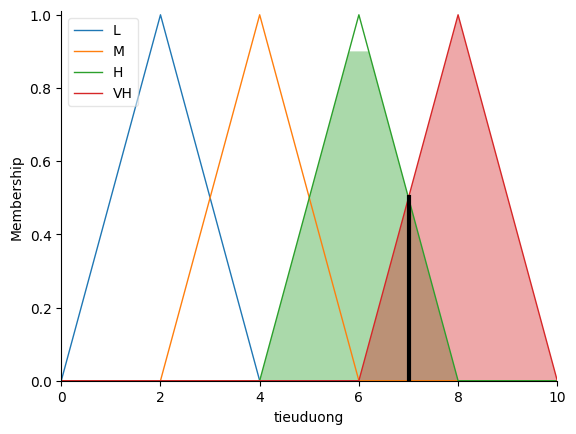

In [ ]:
fuzzy_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
fuzzy_system = ctrl.ControlSystemSimulation(fuzzy_system)
fuzzy_system.input['blood_sugar'] = 220
fuzzy_system.input['body_index'] = 25
fuzzy_system.input['urination'] = 5.5
fuzzy_system.input['fatigue'] = 5
fuzzy_system.compute()
print('Nguy co mac tieu duong', fuzzy_system.output['tieuduong'])
tieuduong.view(sim=fuzzy_system)

2.3

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

demand_level = ctrl.Antecedent(np.arange(0,10.1,0.1), 'demand_level')
competitor_pricing= ctrl.Antecedent(np.arange(0,100.1,0.1), 'competitor_pricing')
production_cost = ctrl.Antecedent(np.arange(0,50.1,0.1), 'production_cost')
seasonality = ctrl.Antecedent(np.arange(0,5.1,0.1), 'seasonality')
stock_level = ctrl.Antecedent(np.arange(0,5.1,0.1), 'stock_level')

final_price = ctrl.Consequent(np.arange(0,11,0.1), 'final_price')

demand_level['L'] = fuzz.trimf(demand_level.universe, [0,0,5])
demand_level['M'] = fuzz.trimf(demand_level.universe, [0,5,10])
demand_level['H'] = fuzz.trimf(demand_level.universe, [5,10,10])

competitor_pricing['L'] = fuzz.trimf(competitor_pricing.universe, [0,0,50])
competitor_pricing['M'] = fuzz.trimf(competitor_pricing.universe, [0,50,100])
competitor_pricing['H'] = fuzz.trimf(competitor_pricing.universe, [50,100,100])

production_cost['L'] = fuzz.trimf(production_cost.universe, [0,0,25])
production_cost['M'] = fuzz.trimf(production_cost.universe, [0,25,50])
production_cost['H'] = fuzz.trimf(production_cost.universe, [25,50,50])

seasonality['O'] = fuzz.trimf(seasonality.universe, [0,0,2.5])
seasonality['N'] = fuzz.trimf(seasonality.universe, [0,2.5,5])
seasonality['P'] = fuzz.trimf(seasonality.universe, [2.5,5,5])

stock_level['L'] = fuzz.trimf(stock_level.universe, [0,0,2.5])
stock_level['M'] = fuzz.trimf(stock_level.universe, [0,2.5,5])
stock_level['H'] = fuzz.trimf(stock_level.universe, [2.5,5,5])

final_price['VL'] = fuzz.trimf(final_price.universe, [0,1.67,3.34])
final_price['L'] = fuzz.trimf(final_price.universe, [1.67,3.34,5.01])
final_price['M'] = fuzz.trimf(final_price.universe, [3.34,5.01,6.68])
final_price['H'] = fuzz.trimf(final_price.universe, [5.01,6.68,8.35])
final_price['VH'] = fuzz.trimf(final_price.universe, [6.68,8.35,10.2])


In [ ]:
rule1 = ctrl.Rule(demand_level['H']&competitor_pricing['H']&stock_level['L'], final_price['VH'])
rule2 = ctrl.Rule(demand_level['H']&seasonality['P']&stock_level['L'], final_price['VH'])
rule3 = ctrl.Rule(demand_level['M']&production_cost['H']&stock_level['L'], final_price['VH'])

rule4 = ctrl.Rule(demand_level['M']&competitor_pricing['M']&stock_level['M'], final_price['M'])
rule5 = ctrl.Rule(demand_level['L']&competitor_pricing['H']&stock_level['M'], final_price['M'])
rule6 = ctrl.Rule(demand_level['M']&production_cost['M']&stock_level['M'], final_price['M'])


rule7 = ctrl.Rule(demand_level['L']&competitor_pricing['L']&stock_level['H'], final_price['L'])
rule8 = ctrl.Rule(demand_level['M']&production_cost['L']&stock_level['H'], final_price['L'])
rule9 = ctrl.Rule(demand_level['L']&seasonality['O']&stock_level['H'], final_price['L'])

rule10 = ctrl.Rule(demand_level['H']&competitor_pricing['M']&stock_level['M'], final_price['H'])
rule11 = ctrl.Rule(demand_level['M']&competitor_pricing['H']&stock_level['L'], final_price['H'])
rule12 = ctrl.Rule(demand_level['H']&seasonality['P']&stock_level['M'], final_price['H'])

rule13 = ctrl.Rule(demand_level['L']&competitor_pricing['L']&stock_level['H'], final_price['VL'])
rule14 = ctrl.Rule(demand_level['L']&seasonality['O']&stock_level['H'], final_price['VL'])
rule15 = ctrl.Rule(demand_level['M']&competitor_pricing['L']&stock_level['H'], final_price['VL'])
rule16 = ctrl.Rule(demand_level['M']&competitor_pricing['L']&stock_level['H'], final_price['VL'])


Gia cuoi cung 6.447894038922086


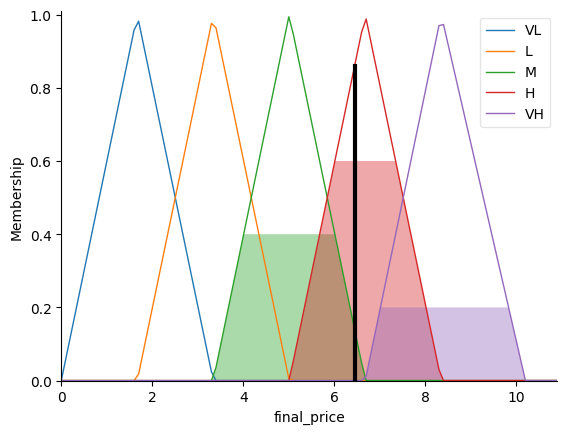

In [ ]:
fuzzy_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16])
fuzzy_system = ctrl.ControlSystemSimulation(fuzzy_system)
fuzzy_system.input['demand_level'] = 8
fuzzy_system.input['competitor_pricing'] = 60
fuzzy_system.input['production_cost'] = 35
fuzzy_system.input['seasonality'] = 3
fuzzy_system.input['stock_level'] = 2
fuzzy_system.compute()
print('Gia cuoi cung', fuzzy_system.output['final_price'])
final_price.view(sim=fuzzy_system)

2.4

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

load = ctrl.Antecedent(np.arange(0,10.1,0.1), 'load')
dirty_level= ctrl.Antecedent(np.arange(0,100.1,0.1), 'dirty_level')
fabric = ctrl.Antecedent(np.arange(0,5.1,0.1), 'fabric')
time = ctrl.Consequent(np.arange(0,30,0.1), 'time')
water = ctrl.Consequent(np.arange(0,40.1,0.1), 'water')

load['S'] = fuzz.trimf(load.universe, [0,0,5])
load['M'] = fuzz.trimf(load.universe, [0,5,10])
load['L'] = fuzz.trimf(load.universe, [0,10,10])

dirty_level['L'] = fuzz.trimf(dirty_level.universe, [0,0,50])
dirty_level['M'] = fuzz.trimf(dirty_level.universe, [0,50,100])
dirty_level['H'] = fuzz.trimf(dirty_level.universe, [50,50,100])

fabric['D'] = fuzz.trimf(fabric.universe, [0,0,2.5])
fabric['N'] = fuzz.trimf(fabric.universe, [0,2.5,5])
fabric['H'] = fuzz.trimf(fabric.universe, [2.5,5,5])

time['S'] = fuzz.trimf(time.universe, [0,0,15])
time['M'] = fuzz.trimf(time.universe, [0,15,30])
time['L'] = fuzz.trimf(time.universe, [15,30,30])

water['L'] = fuzz.trimf(water.universe, [0,0,20])
water['M'] = fuzz.trimf(water.universe, [0,20,40])
water['H'] = fuzz.trimf(water.universe, [20,40,40])

In [ ]:
rule1 = ctrl.Rule(load['S'] & dirty_level['L'], time['S'])
rule2 = ctrl.Rule(load['S'] & dirty_level['L'], water['L'])
rule3 = ctrl.Rule(load['S'] & dirty_level['M'], time['M'])
rule4 = ctrl.Rule(load['S'] & dirty_level['M'], water['M'])
rule5 = ctrl.Rule(load['S'] & dirty_level['H'], time['L'])
rule6 = ctrl.Rule(load['S'] & dirty_level['H'], water['M'])

rule7 = ctrl.Rule(load['M'] & dirty_level['L'], time['M'])
rule8 = ctrl.Rule(load['M'] & dirty_level['L'], water['M'])
rule9 = ctrl.Rule(load['M'] & dirty_level['H'], time['L'])
rule10 = ctrl.Rule(load['M'] & dirty_level['H'], water['H'])
rule11 = ctrl.Rule(load['L'] & dirty_level['L'], time['M'])
rule12 = ctrl.Rule(load['L'] & dirty_level['L'], water['H'])

rule13 = ctrl.Rule(load['L'] & dirty_level['L'], time['L'])
rule14 = ctrl.Rule(load['L'] & dirty_level['L'], water['H'])
rule15 = ctrl.Rule(load['L'] & dirty_level['M'], time['L'])
rule16 = ctrl.Rule(load['L'] & dirty_level['M'], water['H'])
rule17 = ctrl.Rule(load['L'] & dirty_level['H'], time['L'])
rule18 = ctrl.Rule(load['L'] & dirty_level['H'], water['H'])

rule19 = ctrl.Rule(fabric['D'], time['S'])
rule20 = ctrl.Rule(fabric['D'], water['L'])
rule21 = ctrl.Rule(fabric['N'], time['M'])
rule22 = ctrl.Rule(fabric['N'], water['M'])
rule23 = ctrl.Rule(fabric['H'], time['L'])
rule24 = ctrl.Rule(fabric['H'], water['H'])

rule25 = ctrl.Rule(load['L'] & dirty_level['H'] & fabric['H'], time['L'])
rule26 = ctrl.Rule(load['L'] & dirty_level['H'] & fabric['H'], water['H'])
rule27 = ctrl.Rule(load['S'] & dirty_level['L'] & fabric['D'], time['S'])
rule28 = ctrl.Rule(load['S'] & dirty_level['L'] & fabric['D'], water['L'])
rule29 = ctrl.Rule(load['M'] & dirty_level['M'] & fabric['N'], time['M'])
rule30 = ctrl.Rule(load['M'] & dirty_level['M'] & fabric['N'], water['M'])

thoi gian giac do 17.35283562960594
nuoc su dung 23.212121212121264


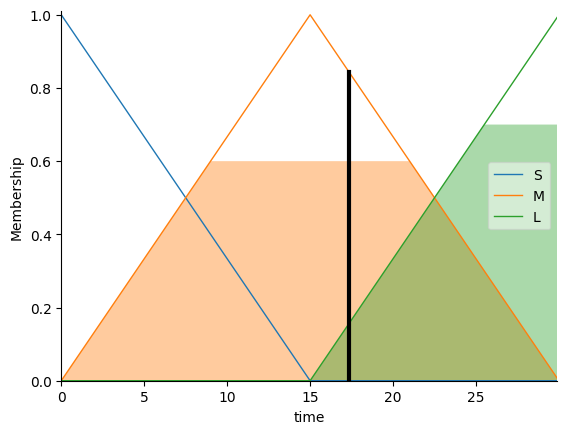

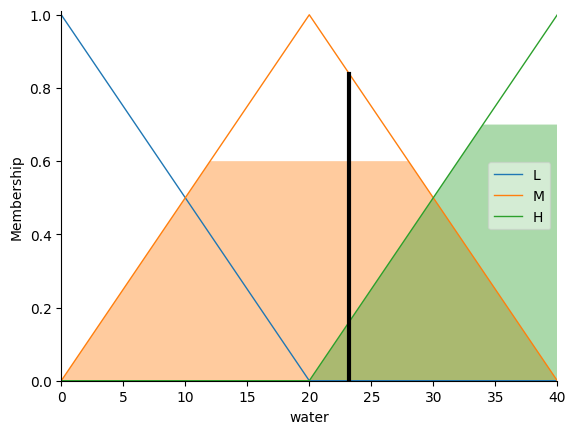

In [ ]:
fuzzy_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27,rule28,rule29,rule30])
fuzzy_system = ctrl.ControlSystemSimulation(fuzzy_system)
fuzzy_system.input['load'] = 7
fuzzy_system.input['dirty_level'] = 60
fuzzy_system.input['fabric'] = 3.5
fuzzy_system.compute()
print('thoi gian giac do', fuzzy_system.output['time'])
print('nuoc su dung', fuzzy_system.output['water'])
time.view(sim=fuzzy_system)
water.view(sim=fuzzy_system)

2.5

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 17.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature = ctrl.Antecedent(np.arange(0,41,0.1), 'temperature')
humidity= ctrl.Antecedent(np.arange(0,11,0.1), 'humidity')
people = ctrl.Antecedent(np.arange(0,50,0.1), 'people')
fan_speed = ctrl.Consequent(np.arange(0,100.1,0.1), 'fan_speed')
cooling_level = ctrl.Consequent(np.arange(0,5.1,0.1), 'cooling_level')

temperature['C'] = fuzz.trimf(temperature.universe, [0,6.68,13.36])
temperature['CL'] = fuzz.trimf(temperature.universe, [6.68,13.36,20.04])
temperature['CM'] = fuzz.trimf(temperature.universe, [13.36,20.04,26.72])
temperature['W'] = fuzz.trimf(temperature.universe, [20.04,26.72,33.4])
temperature['H'] = fuzz.trimf(temperature.universe, [26.72,33.4,40.08])

humidity['L'] = fuzz.trimf(humidity.universe, [0,0,5])
humidity['M'] = fuzz.trimf(humidity.universe, [0,5,10])
humidity['H'] = fuzz.trimf(humidity.universe, [5,10,10])

people['F'] = fuzz.trimf(people.universe, [0,0,25])
people['M'] = fuzz.trimf(people.universe, [0,25,50])
people['H'] = fuzz.trimf(people.universe, [25,50,50])

fan_speed['L'] = fuzz.trimf(fan_speed.universe, [0,0,50])
fan_speed['M'] = fuzz.trimf(fan_speed.universe, [0,50,100])
fan_speed['H'] = fuzz.trimf(fan_speed.universe, [50,50,100])

cooling_level['L'] = fuzz.trimf(cooling_level.universe, [0,0,2.5])
cooling_level['M'] = fuzz.trimf(cooling_level.universe, [0,2.5,5])
cooling_level['H'] = fuzz.trimf(cooling_level.universe, [2.5,5,5])

In [ ]:
rule1 = ctrl.Rule(temperature['C'], fan_speed['L'])
rule2 = ctrl.Rule(temperature['CL'], fan_speed['L'])
rule3 = ctrl.Rule(temperature['CM'], fan_speed['M'])
rule4 = ctrl.Rule(temperature['W'], fan_speed['H'])
rule5 = ctrl.Rule(temperature['H'], fan_speed['H'])

rule6 = ctrl.Rule(temperature['C'], cooling_level['L'])
rule7 = ctrl.Rule(temperature['CL'], cooling_level['L'])
rule8 = ctrl.Rule(temperature['CM'], cooling_level['M'])
rule9 = ctrl.Rule(temperature['W'], cooling_level['H'])
rule10 = ctrl.Rule(temperature['H'], cooling_level['H'])

rule11 = ctrl.Rule(humidity['M'], cooling_level['M'])
rule12 = ctrl.Rule(humidity['H'], cooling_level['H'])

rule13 = ctrl.Rule(people['F'], fan_speed['L'])
rule14 = ctrl.Rule(people['M'], fan_speed['M'])
rule15 = ctrl.Rule(people['H'], fan_speed['H'])

rule16 = ctrl.Rule(temperature['H'] & humidity['H'] & people['H'], fan_speed['H'])
rule17 = ctrl.Rule(temperature['H'] & humidity['H'] & people['H'], cooling_level['H'])
rule18 = ctrl.Rule(temperature['CM'] & humidity['M'] & people['M'], fan_speed['M'])
rule19 = ctrl.Rule(temperature['CM'] & humidity['M'] & people['M'], cooling_level['M'])
rule20 = ctrl.Rule(temperature['CL'] & humidity['L'] & people['F'], fan_speed['L'])
rule21 = ctrl.Rule(temperature['CL'] & humidity['L'] & people['F'], cooling_level['L'])

toc do quat: 49.999999999999865
Muc do lam mat: 2.9390243902439024


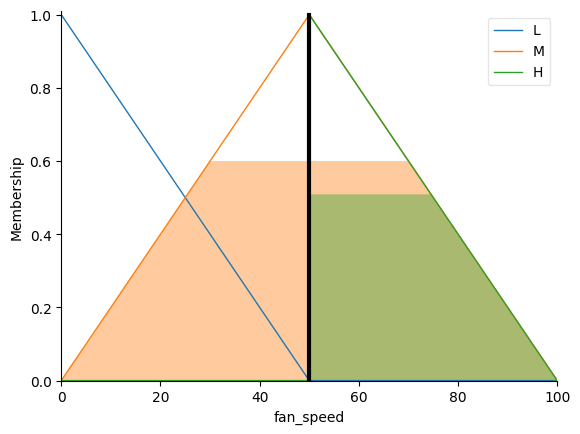

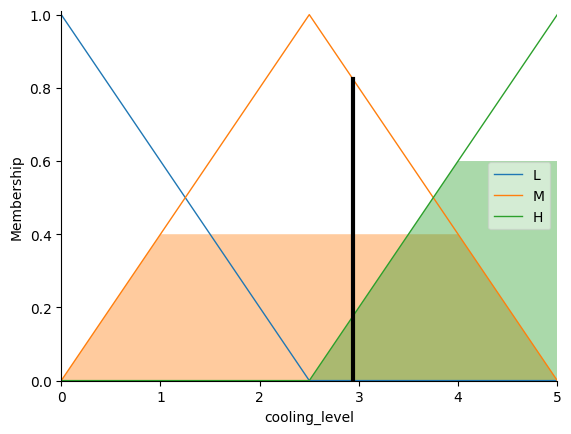

In [ ]:
fuzzy_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21])
fuzzy_system = ctrl.ControlSystemSimulation(fuzzy_system)
fuzzy_system.input['temperature'] = 30
fuzzy_system.input['humidity'] = 8
fuzzy_system.input['people'] = 35
fuzzy_system.compute()
print('toc do quat:', fuzzy_system.output['fan_speed'])
print('Muc do lam mat:', fuzzy_system.output['cooling_level'])
fan_speed.view(sim=fuzzy_system)
cooling_level.view(sim=fuzzy_system)

2.6

In [ ]:
from typing_extensions import Type
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

weight = ctrl.Antecedent(np.arange(0,100.1,0.1), 'weight')
Type = ctrl.Antecedent(np.arange(0,11,0.1), 'Type')
temperature = ctrl.Antecedent(np.arange(0,60,0.1), 'temperature')

cooking_time = ctrl.Consequent(np.arange(0,50.1,0.1), 'cooking_time')
congsuat = ctrl.Consequent(np.arange(0,100.1,0.1), 'congsuat')

weight['L'] = fuzz.trimf(weight.universe, [0,0,50])
weight['M'] = fuzz.trimf(weight.universe, [0,50,100])
weight['H'] = fuzz.trimf(weight.universe, [50,100,100])

Type['S'] = fuzz.trimf(Type.universe, [0,0,5])
Type['M'] = fuzz.trimf(Type.universe, [0,5,10])
Type['H'] = fuzz.trimf(Type.universe, [5,10,10])

temperature['C'] = fuzz.trimf(temperature.universe, [0,0,30])
temperature['W'] = fuzz.trimf(temperature.universe, [0,30,60])
temperature['H'] = fuzz.trimf(temperature.universe, [30,60,60])

cooking_time['S'] = fuzz.trimf(cooking_time.universe, [0,0,25])
cooking_time['M'] = fuzz.trimf(cooking_time.universe, [0,25,50])
cooking_time['L'] = fuzz.trimf(cooking_time.universe, [25,50,50])

congsuat['L'] = fuzz.trimf(congsuat.universe, [0,30,60])
congsuat['M'] = fuzz.trimf(congsuat.universe, [30,60,95])
congsuat['H'] = fuzz.trimf(congsuat.universe, [60,95,98])

In [ ]:
rule1 = ctrl.Rule(weight['L'], cooking_time['S'])
rule2 = ctrl.Rule(weight['M'], cooking_time['M'])
rule3 = ctrl.Rule(weight['H'], cooking_time['L'])

rule4 = ctrl.Rule(Type['S'], congsuat['L'])
rule5 = ctrl.Rule(Type['M'], congsuat['M'])
rule6 = ctrl.Rule(Type['H'], congsuat['H'])

rule7 = ctrl.Rule(temperature['C'], cooking_time['L'])
rule8 = ctrl.Rule(temperature['W'], cooking_time['M'])
rule9 = ctrl.Rule(temperature['H'], cooking_time['S'])

rule10 = ctrl.Rule(weight['H']&Type['H']&temperature['C'], cooking_time['L'])
rule11 = ctrl.Rule(weight['H']&Type['H']&temperature['C'], congsuat['H'])
rule12 = ctrl.Rule(weight['M']&Type['S']&temperature['W'], cooking_time['M'])
rule13 = ctrl.Rule(weight['M']&Type['S']&temperature['W'], congsuat['L'])
rule14 = ctrl.Rule(weight['L']&Type['M']&temperature['H'], cooking_time['S'])
rule15 = ctrl.Rule(weight['L']&Type['M']&temperature['H'], congsuat['M'])

thoi gian nau: 25.137854819914217
cong suat: 62.966461159062824


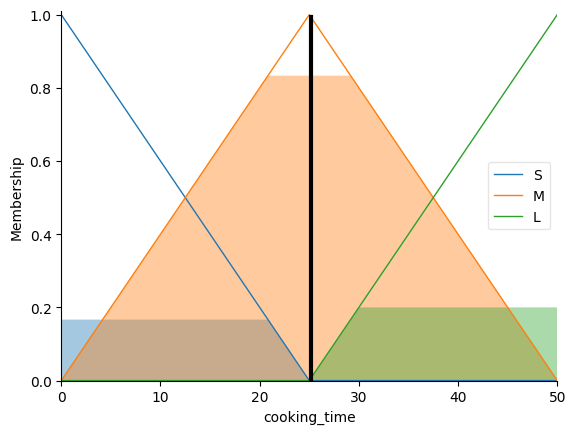

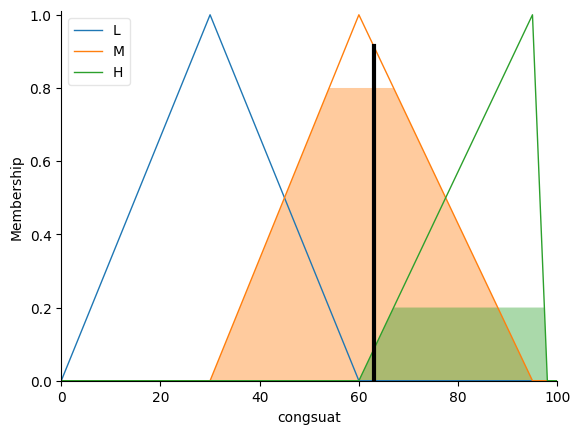

In [ ]:
fuzzy_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
fuzzy_system = ctrl.ControlSystemSimulation(fuzzy_system)
fuzzy_system.input['weight'] = 60
fuzzy_system.input['Type'] = 6
fuzzy_system.input['temperature'] = 35
fuzzy_system.compute()
print('thoi gian nau:', fuzzy_system.output['cooking_time'])
print('cong suat:', fuzzy_system.output['congsuat'])
cooking_time.view(sim=fuzzy_system)
congsuat.view(sim=fuzzy_system)

2.7

In [ ]:
from typing_extensions import Type
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,0.1), 'food')
weight = ctrl.Antecedent(np.arange(0,100.1,0.1), 'weight')
temperature = ctrl.Antecedent(np.arange(0,60,0.1), 'temperature')
water = ctrl.Antecedent(np.arange(0,100.1,0.1), 'water')
cooking_time = ctrl.Consequent(np.arange(0,50.1,0.1), 'cooking_time')
congsuat = ctrl.Consequent(np.arange(0,100.1,0.1), 'congsuat')
food['S'] = fuzz.trimf(food.universe, [0,0,5])
food['M'] = fuzz.trimf(food.universe, [0,5,10])
food['H'] = fuzz.trimf(food.universe, [5,10,10])

cooking_time['S'] = fuzz.trimf(cooking_time.universe, [0,0,25])
cooking_time['M'] = fuzz.trimf(cooking_time.universe, [0,25,50])
cooking_time['L'] = fuzz.trimf(cooking_time.universe, [25,50,50])

congsuat['L'] = fuzz.trimf(congsuat.universe, [0,30,60])
congsuat['M'] = fuzz.trimf(congsuat.universe, [30,60,95])
congsuat['H'] = fuzz.trimf(congsuat.universe, [60,95,98])

temperature['C'] = fuzz.trimf(temperature.universe, [0,0,30])
temperature['W'] = fuzz.trimf(temperature.universe, [0,30,60])
temperature['H'] = fuzz.trimf(temperature.universe, [30,60,60])

weight['L'] = fuzz.trimf(weight.universe, [0,0,50])
weight['M'] = fuzz.trimf(weight.universe, [0,50,100])
weight['H'] = fuzz.trimf(weight.universe, [50,100,100])

water['L'] = fuzz.trimf(water.universe, [0,0,50])
water['M'] = fuzz.trimf(water.universe, [0,50,100])
water['H'] = fuzz.trimf(water.universe, [50,100,100])

In [ ]:
rule1 = ctrl.Rule(weight['L'], cooking_time['S'])
rule2 = ctrl.Rule(weight['M'], cooking_time['M'])
rule3 = ctrl.Rule(weight['H'], cooking_time['L'])

rule4 = ctrl.Rule(food['S'], congsuat['L'])
rule5 = ctrl.Rule(food['M'], congsuat['M'])
rule6 = ctrl.Rule(food['H'], congsuat['H'])

rule7 = ctrl.Rule(temperature['C'], cooking_time['L'])
rule8 = ctrl.Rule(temperature['W'], cooking_time['M'])
rule9 = ctrl.Rule(temperature['H'], cooking_time['S'])

rule10 = ctrl.Rule(water['L'], cooking_time['S'])
rule11 = ctrl.Rule(water['M'], cooking_time['M'])
rule12 = ctrl.Rule(water['H'], cooking_time['L'])

rule13 = ctrl.Rule(weight['H']&food['H']&temperature['C']&water['H'], cooking_time['L'])
rule14 = ctrl.Rule(weight['H']&food['H']&temperature['C']&water['H'], congsuat['H'])
rule15 = ctrl.Rule(weight['M']&food['S']&temperature['W']&water['M'], cooking_time['M'])
rule16 = ctrl.Rule(weight['M']&food['S']&temperature['W']&water['M'], congsuat['L'])
rule17 = ctrl.Rule(weight['L']&food['M']&temperature['H']&water['L'], cooking_time['S'])
rule18 = ctrl.Rule(weight['L']&food['M']&temperature['H']&water['L'], congsuat['M'])


thoi gian nau: 23.81865284974095
cong suat: 62.966461159062824


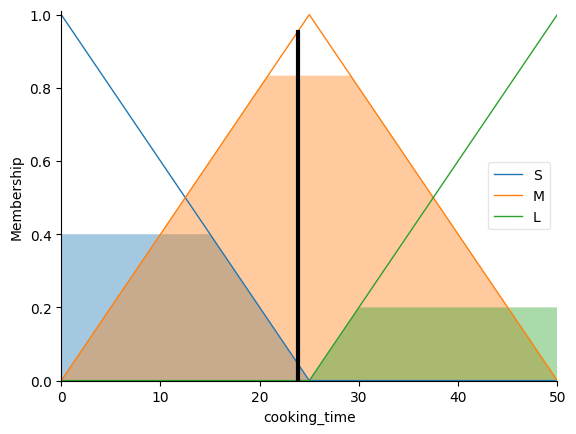

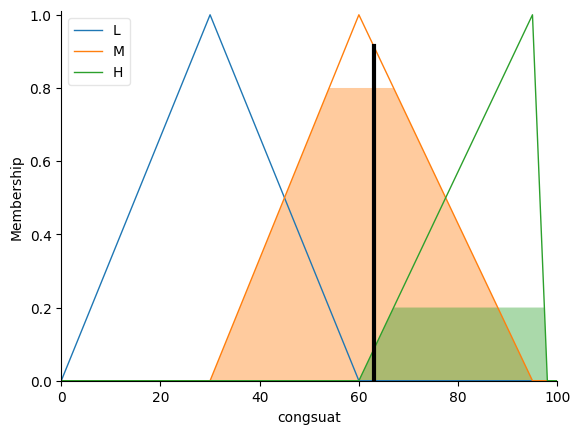

In [ ]:
fuzzy_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
fuzzy_system = ctrl.ControlSystemSimulation(fuzzy_system)
fuzzy_system.input['weight'] = 60
fuzzy_system.input['food'] = 6
fuzzy_system.input['temperature'] = 35
fuzzy_system.input['water'] = 30
fuzzy_system.compute()
print('thoi gian nau:', fuzzy_system.output['cooking_time'])
print('cong suat:', fuzzy_system.output['congsuat'])
cooking_time.view(sim=fuzzy_system)
congsuat.view(sim=fuzzy_system)

2.8

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

heart_rate = ctrl.Antecedent(np.arange(0,150.1,0.1), 'heart_rate')
blood_pressure = ctrl.Antecedent(np.arange(0,200.1,0.1), 'blood_pressure')
temperature = ctrl.Antecedent(np.arange(0,50,0.1), 'temperature')
oxygen = ctrl.Antecedent(np.arange(0,100.1,0.1), 'oxygen')
blood_sugar = ctrl.Antecedent(np.arange(0,240.1,0.1), 'blood_sugar')

medicine = ctrl.Consequent(np.arange(0,11,0.1), 'medicine')
dichtinhmach = ctrl.Consequent(np.arange(0,5.1,0.1), 'dichtinhmach')
lieuphapoxy = ctrl.Consequent(np.arange(0,3.1,0.1), 'lieuphapoxy')

blood_pressure['L'] = fuzz.trimf(blood_pressure.universe, [40,70,100])
blood_pressure['M'] = fuzz.trimf(blood_pressure.universe, [70,100,130])
blood_pressure['H'] = fuzz.trimf(blood_pressure.universe, [130,160,190])

temperature['L'] = fuzz.trimf(temperature.universe, [25,30,36.5])
temperature['M'] = fuzz.trimf(temperature.universe, [30,36.5,40])
temperature['H'] = fuzz.trimf(temperature.universe, [36.5,40,45])


heart_rate['L'] = fuzz.trimf(heart_rate.universe, [0,40,80])
heart_rate['M'] = fuzz.trimf(heart_rate.universe, [40,80,120])
heart_rate['H'] = fuzz.trimf(heart_rate.universe, [80,120,140])

oxygen['L'] = fuzz.trimf(oxygen.universe, [70,80,93])
oxygen['M'] = fuzz.trimf(oxygen.universe, [80,93,100])

blood_sugar['L'] = fuzz.trimf(blood_sugar.universe, [20,50,80])
blood_sugar['M'] = fuzz.trimf(blood_sugar.universe, [60,100,140])
blood_sugar['H'] = fuzz.trimf(blood_sugar.universe, [140,200,240])

medicine['D'] = fuzz.trimf(medicine.universe, [0,0,5])
medicine['M'] = fuzz.trimf(medicine.universe, [0,5,10])
medicine['I'] = fuzz.trimf(medicine.universe, [5,10,10])

dichtinhmach['R'] = fuzz.trimf(dichtinhmach.universe, [0,0,2.5])
dichtinhmach['M'] = fuzz.trimf(dichtinhmach.universe, [0,2.5,5])
dichtinhmach['I'] = fuzz.trimf(dichtinhmach.universe, [2.5,5,5])

lieuphapoxy['R'] = fuzz.trimf(lieuphapoxy.universe, [0,0,1.5])
lieuphapoxy['M'] = fuzz.trimf(lieuphapoxy.universe, [0,1.5,3])
lieuphapoxy['I'] = fuzz.trimf(lieuphapoxy.universe, [1.5,3,3])


In [ ]:
rule1 = ctrl.Rule(heart_rate['L']&blood_pressure['L'], dichtinhmach['I'])
rule2 = ctrl.Rule(heart_rate['L']&blood_pressure['L'], medicine['I'])
rule3 = ctrl.Rule(heart_rate['H']&blood_pressure['H'], medicine['D'])
rule4 = ctrl.Rule(heart_rate['M']&blood_pressure['M'], medicine['M'])

rule5 = ctrl.Rule(temperature['H']&oxygen['L'], lieuphapoxy['I'])
rule6 = ctrl.Rule(temperature['H']&oxygen['L'], medicine['I'])
rule7 = ctrl.Rule(temperature['M']&oxygen['M'], medicine['M'])
rule8 = ctrl.Rule(temperature['M']&oxygen['M'], lieuphapoxy['M'])
rule9 = ctrl.Rule(temperature['M']&oxygen['M'], dichtinhmach['M'])
rule10 = ctrl.Rule(temperature['L']&oxygen['L'], lieuphapoxy['I'])
rule11 = ctrl.Rule(temperature['L']&oxygen['L'], dichtinhmach['M'])

rule12 = ctrl.Rule(blood_sugar['H'], medicine['I'])
rule13 = ctrl.Rule(blood_sugar['L'], medicine['D'])
rule14 = ctrl.Rule(blood_sugar['M'], medicine['M'])

rule15 = ctrl.Rule(blood_pressure['H']&blood_sugar['H']&heart_rate['H'], medicine['D'])
rule16 = ctrl.Rule(blood_pressure['L']&blood_sugar['L']&heart_rate['L'], dichtinhmach['I'])
rule17 = ctrl.Rule(blood_pressure['M']&blood_sugar['M']&heart_rate['M'], medicine['I'])
rule18 = ctrl.Rule(blood_pressure['M']&blood_sugar['M']&heart_rate['M'], lieuphapoxy['M'])
rule19 = ctrl.Rule(temperature['H']&blood_pressure['H']&oxygen['M'], lieuphapoxy['I'])
rule20 = ctrl.Rule(temperature['H']&blood_pressure['H']&oxygen['M'], medicine['I'])

lieu luong thuoc dung: 5.502319126485295
dich truyen tinh mach: 2.500000000000001
lieu luong lieu pha oxy: 1.4999999999999996


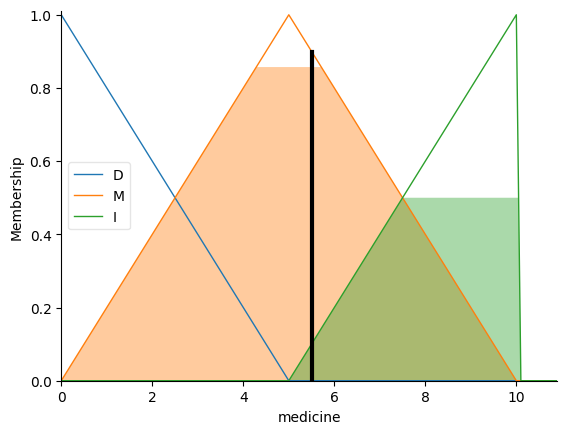

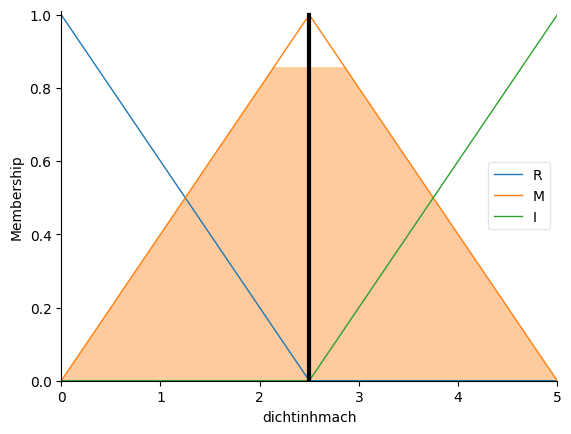

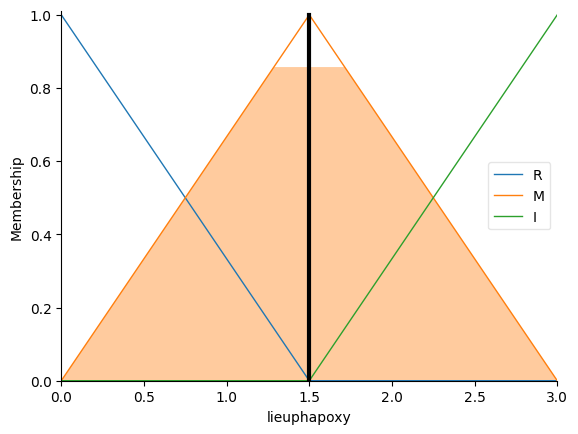

In [ ]:
fuzzy_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20])
fuzzy_system = ctrl.ControlSystemSimulation(fuzzy_system)
fuzzy_system.input['heart_rate'] = 70
fuzzy_system.input['blood_pressure'] = 100
fuzzy_system.input['temperature'] = 37
fuzzy_system.input['oxygen'] = 94
fuzzy_system.input['blood_sugar'] = 80
fuzzy_system.compute()
print('lieu luong thuoc dung:', fuzzy_system.output['medicine'])
print('dich truyen tinh mach:', fuzzy_system.output['dichtinhmach'])
print('lieu luong lieu pha oxy:', fuzzy_system.output['lieuphapoxy'])
medicine.view(sim=fuzzy_system)
dichtinhmach.view(sim=fuzzy_system)
lieuphapoxy.view(sim=fuzzy_system)


2.9

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

sensitive_score = ctrl.Antecedent(np.arange(0,1.1,0.1), 'sensitive_score')
emotion_insenity = ctrl.Antecedent(np.arange(0,3.1,0.1), 'emotion_insenity')
p_words = ctrl.Antecedent(np.arange(0,10.1,0.1), 'p_words')
n_words = ctrl.Antecedent(np.arange(0,10.1,0.1), 'n_words')

sensitive_classify = ctrl.Consequent(np.arange(0,11,0.1), 'sensitive_classify')

sensitive_score['N'] = fuzz.trimf(sensitive_score.universe, [0,0.2,0.5])
sensitive_score['M'] = fuzz.trimf(sensitive_score.universe, [0.2,0.5,0.8])
sensitive_score['P'] = fuzz.trimf(sensitive_score.universe, [0.5,0.8,1])

emotion_insenity['L'] = fuzz.trimf(emotion_insenity.universe, [0,0,1.5])
emotion_insenity['M'] = fuzz.trimf(emotion_insenity.universe, [0,1.5,3])
emotion_insenity['H'] = fuzz.trimf(emotion_insenity.universe, [1.5,3,3])

p_words['F'] = fuzz.trimf(p_words.universe, [1,2,3])
p_words['S'] = fuzz.trimf(p_words.universe, [3,4,5])
p_words['M'] = fuzz.trimf(p_words.universe, [5,10,10])

n_words['F'] = fuzz.trimf(n_words.universe, [1,2,3])
n_words['S'] = fuzz.trimf(n_words.universe, [3,4,5])
n_words['M'] = fuzz.trimf(n_words.universe, [5,10,10])

sensitive_classify['N'] = fuzz.trimf(sensitive_classify.universe, [0,0,5])
sensitive_classify['M'] = fuzz.trimf(sensitive_classify.universe, [0,5,10])
sensitive_classify['P'] = fuzz.trimf(sensitive_classify.universe, [5,10,10])


In [ ]:
rule1 = ctrl.Rule(sensitive_score['N']&emotion_insenity['H'], sensitive_classify['N'])
rule2 = ctrl.Rule(sensitive_score['N']&emotion_insenity['L'], sensitive_classify['M'])
rule3 = ctrl.Rule(sensitive_score['M']&emotion_insenity['M'], sensitive_classify['M'])
rule4 = ctrl.Rule(sensitive_score['P']&emotion_insenity['H'], sensitive_classify['P'])

rule5 = ctrl.Rule(p_words['M']&n_words['F'], sensitive_classify['P'])
rule6 = ctrl.Rule(p_words['F']&n_words['M'], sensitive_classify['N'])
rule7 = ctrl.Rule(p_words['S']&n_words['S'], sensitive_classify['M'])

rule8 = ctrl.Rule(sensitive_score['N']&n_words['M']&emotion_insenity['H'], sensitive_classify['N'])
rule9 = ctrl.Rule(sensitive_score['M']&p_words['S']&emotion_insenity['M'], sensitive_classify['M'])
rule10 = ctrl.Rule(sensitive_score['P']&p_words['M']&emotion_insenity['H'], sensitive_classify['P'])

danh gia cam xuc: 5.289538631071192


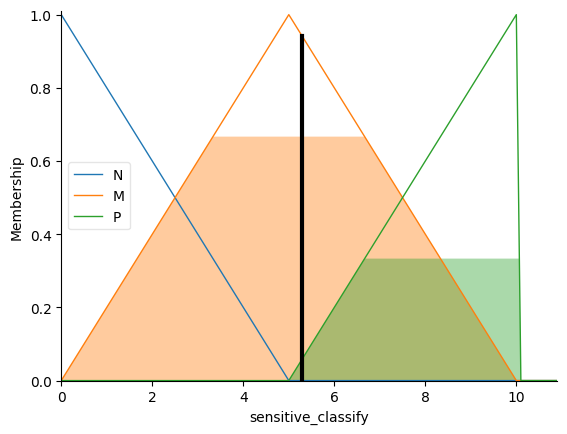

In [ ]:
fuzzy_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,])
fuzzy_system = ctrl.ControlSystemSimulation(fuzzy_system)
fuzzy_system.input['emotion_insenity'] = 2
fuzzy_system.input['sensitive_score'] = 0.6
fuzzy_system.input['p_words'] = 4
fuzzy_system.input['n_words'] = 2
fuzzy_system.compute()
print('danh gia cam xuc:', fuzzy_system.output['sensitive_classify'])
sensitive_classify.view(sim=fuzzy_system)

2.10

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

traffic_condition= ctrl.Antecedent(np.arange(0,11,0.1), 'traffic_condition')
distance = ctrl.Antecedent(np.arange(0,15.1,0.1), 'distance')
weather = ctrl.Antecedent(np.arange(0,10.1,0.1), 'weather')
order_time = ctrl.Antecedent(np.arange(0,20.1,0.1), 'order_time')
fatigue = ctrl.Antecedent(np.arange(0,3.1,0.1), 'fatigue')

time = ctrl.Consequent(np.arange(0,30.1,0.1), 'time')
bonus = ctrl.Consequent(np.arange(0,10.1,0.1), 'bonus')
rating = ctrl.Consequent(np.arange(0,5,0.1), 'rating')

traffic_condition['L'] = fuzz.trimf(traffic_condition.universe, [0,0,5])
traffic_condition['M'] = fuzz.trimf(traffic_condition.universe, [0,5,10])
traffic_condition['H'] = fuzz.trimf(traffic_condition.universe, [5,10,10])

distance['S'] = fuzz.trimf(distance.universe, [0,2.75,6])
distance['M'] = fuzz.trimf(distance.universe, [2.75,6,9])
distance['L'] = fuzz.trimf(distance.universe, [6,9,12])

weather['C'] = fuzz.trimf(weather.universe, [0,0,5])
weather['R'] = fuzz.trimf(weather.universe, [0,5,10])
weather['S'] = fuzz.trimf(weather.universe, [5,10,10])

order_time['S'] = fuzz.trimf(order_time.universe, [0,0,10])
order_time['M'] = fuzz.trimf(order_time.universe, [5,10,20])
order_time['L'] = fuzz.trimf(order_time.universe, [10,20,20])

fatigue['L'] = fuzz.trimf(fatigue.universe, [0,0,2.5])
fatigue['M'] = fuzz.trimf(fatigue.universe, [0,2.5,3])
fatigue['H'] = fuzz.trimf(fatigue.universe, [2.5,3,3])

time['S'] = fuzz.trimf(time.universe, [0,0,15.5])
time['M'] = fuzz.trimf(time.universe, [0,15.5,30])
time['L'] = fuzz.trimf(time.universe, [15.5,30,30])

bonus['L'] = fuzz.trimf(bonus.universe, [0,0,5])
bonus['M'] = fuzz.trimf(bonus.universe, [0,5,10])
bonus['H'] = fuzz.trimf(bonus.universe, [5,10,10])

rating['L'] = fuzz.trimf(rating.universe, [1,2,3])
rating['M'] = fuzz.trimf(rating.universe, [2,3,4])
rating['H'] = fuzz.trimf(rating.universe, [3,4,5])

In [ ]:
rule1 = ctrl.Rule(traffic_condition['L']&distance['S'], time['S'])
rule2 = ctrl.Rule(traffic_condition['M']&distance['M'], time['M'])
rule3 = ctrl.Rule(traffic_condition['H']&distance['L'], time['L'])

rule4 = ctrl.Rule(weather['C'], bonus['L'])
rule5 = ctrl.Rule(weather['R'], bonus['M'])
rule6 = ctrl.Rule(weather['S'], bonus['H'])

rule7 = ctrl.Rule(order_time['S'] & traffic_condition['L'], time['S'])
rule8 = ctrl.Rule(order_time['M'] & traffic_condition['M'], time['M'])
rule9 = ctrl.Rule(order_time['L'] & traffic_condition['H'], time['L'])

rule10 = ctrl.Rule(fatigue['L'], rating['H'])
rule11 = ctrl.Rule(fatigue['M'], rating['M'])
rule12 = ctrl.Rule(fatigue['H'], rating['L'])

rule11 = ctrl.Rule(distance['L']&weather['S']&traffic_condition['H'], time['L'])
rule12 = ctrl.Rule(distance['L']&weather['S']&traffic_condition['H'], bonus['H'])
rule13 = ctrl.Rule(distance['S']&weather['C']&traffic_condition['L'], time['S'])
rule14 = ctrl.Rule(distance['S']&weather['C']&traffic_condition['L'], bonus['L'])
rule15 = ctrl.Rule(fatigue['H']&traffic_condition['H'], rating['L'])
rule16 = ctrl.Rule(fatigue['H']&traffic_condition['H'], time['L'])


thoi gian giao hang: 17.658558558558532
bonus: 5.376811594202895
rating: 3.9868544600938973


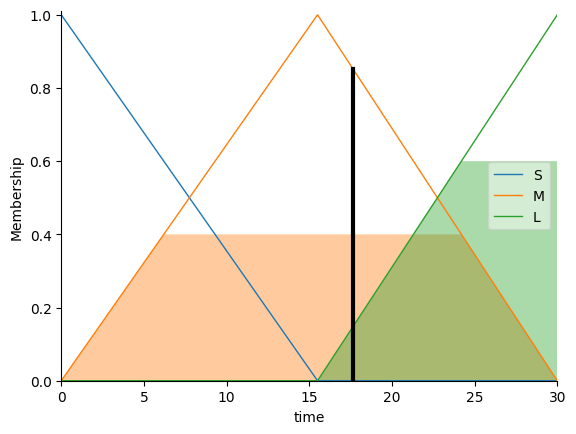

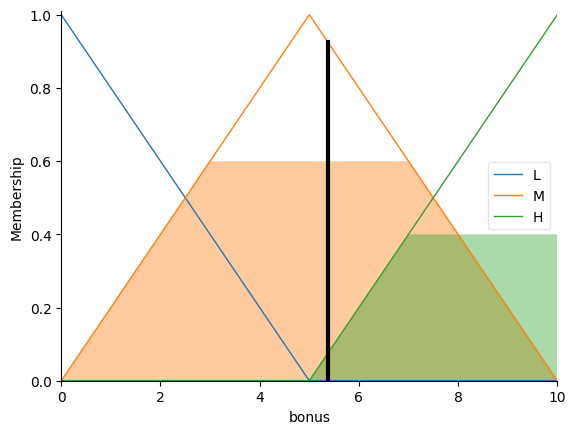

In [ ]:
fuzzy_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16])
fuzzy_system = ctrl.ControlSystemSimulation(fuzzy_system)
fuzzy_system.input['traffic_condition'] = 8
fuzzy_system.input['distance'] = 10
fuzzy_system.input['weather'] = 7
fuzzy_system.input['order_time'] = 8
fuzzy_system.input['fatigue'] = 2
fuzzy_system.compute()
print('thoi gian giao hang:', fuzzy_system.output['time'])
print('bonus:', fuzzy_system.output['bonus'])
print('rating:', fuzzy_system.output['rating'])
time.view(sim=fuzzy_system)
bonus.view(sim=fuzzy_system)

2.11

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

cauthitruong= ctrl.Antecedent(np.arange(0,100.1,0.1), 'cauthitruong')
giadoithu = ctrl.Antecedent(np.arange(0,50.1,0.1), 'giadoithu')
phisanxuat = ctrl.Antecedent(np.arange(0,10.1,0.1), 'phisanxuat')
mua = ctrl.Antecedent(np.arange(0,5.1,0.1), 'mua')
tonkho = ctrl.Antecedent(np.arange(0,10.1,0.1), 'tonkho')

final_price = ctrl.Consequent(np.arange(0,150.1,0.1), 'final_price')

cauthitruong['L'] = fuzz.trimf(cauthitruong.universe, [0,0,50])
cauthitruong['M'] = fuzz.trimf(cauthitruong.universe, [0,50,100])
cauthitruong['H'] = fuzz.trimf(cauthitruong.universe, [50,100,100])

giadoithu['L'] = fuzz.trimf(giadoithu.universe, [0,0,25])
giadoithu['M'] = fuzz.trimf(giadoithu.universe, [0,25,50])
giadoithu['H'] = fuzz.trimf(giadoithu.universe, [25,50,50])

phisanxuat['L'] = fuzz.trimf(phisanxuat.universe, [0,0,5])
phisanxuat['M'] = fuzz.trimf(phisanxuat.universe, [0,5,10])
phisanxuat['H'] = fuzz.trimf(phisanxuat.universe, [5,5,10])

mua['L'] = fuzz.trimf(mua.universe, [0,0,2.5])
mua['M'] = fuzz.trimf(mua.universe, [0,2.5,5])
mua['H'] = fuzz.trimf(mua.universe, [2.5,5,5])

tonkho['L'] = fuzz.trimf(tonkho.universe, [0,0,5])
tonkho['M'] = fuzz.trimf(tonkho.universe, [0,5,10])
tonkho['H'] = fuzz.trimf(tonkho.universe, [5,10,10])

final_price['VL'] = fuzz.trimf(final_price.universe, [0,20,40])
final_price['L'] = fuzz.trimf(final_price.universe, [20,40,60])
final_price['M'] = fuzz.trimf(final_price.universe, [40,60,80])
final_price['H'] = fuzz.trimf(final_price.universe, [60,80,100])
final_price['VH'] = fuzz.trimf(final_price.universe, [80,100,120])

In [ ]:
rule1 = ctrl.Rule(cauthitruong['H']&giadoithu['H']&tonkho['L'], final_price['VH'])
rule2 = ctrl.Rule(cauthitruong['H']&mua['H']&tonkho['L'], final_price['VH'])
rule3 = ctrl.Rule(cauthitruong['M']&phisanxuat['H']&tonkho['L'], final_price['VH'])

rule4 = ctrl.Rule(cauthitruong['H']&giadoithu['M']&tonkho['M'], final_price['H'])
rule5 = ctrl.Rule(cauthitruong['M']&giadoithu['H']&tonkho['L'], final_price['H'])
rule6 = ctrl.Rule(cauthitruong['M']&mua['H']&tonkho['M'], final_price['H'])

rule7 = ctrl.Rule(cauthitruong['M']&giadoithu['M']&tonkho['M'], final_price['M'])
rule8 = ctrl.Rule(cauthitruong['M']&giadoithu['H']&tonkho['M'], final_price['M'])
rule9 = ctrl.Rule(cauthitruong['L']&giadoithu['H']&tonkho['M'], final_price['M'])
rule10 = ctrl.Rule(cauthitruong['M']&phisanxuat['M']&tonkho['M'], final_price['M'])

rule11 = ctrl.Rule(cauthitruong['L']&giadoithu['L']&tonkho['H'], final_price['L'])
rule12 = ctrl.Rule(cauthitruong['M']&phisanxuat['M']&tonkho['H'], final_price['L'])
rule13 = ctrl.Rule(cauthitruong['L']&mua['L']&tonkho['H'], final_price['L'])

rule14 = ctrl.Rule(cauthitruong['L']&giadoithu['L']&tonkho['H'], final_price['VL'])
rule15 = ctrl.Rule(cauthitruong['L']&mua['L']&tonkho['H'], final_price['VL'])
rule16 = ctrl.Rule(cauthitruong['M']&giadoithu['L']&tonkho['H'], final_price['VL'])


gia cuoi cung: 62.43902439024391


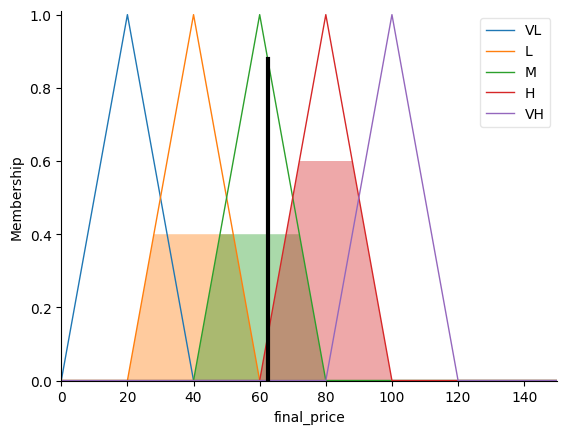

In [ ]:
fuzzy_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16])
fuzzy_system = ctrl.ControlSystemSimulation(fuzzy_system)
fuzzy_system.input['cauthitruong'] = 80
fuzzy_system.input['giadoithu'] = 35
fuzzy_system.input['phisanxuat'] = 7
fuzzy_system.input['mua'] = 4
fuzzy_system.input['tonkho'] = 7
fuzzy_system.compute()
print('gia cuoi cung:', fuzzy_system.output['final_price'])

final_price.view(sim=fuzzy_system)